# Matching Human Connectome Data

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
from pkg.gmp import quadratic_assignment
from pkg.gmp import quadratic_assignment_ot
from pkg.plot import set_theme
import numpy as np
import pandas as pd

In [3]:
# hide
import sys
sys.path
sys.path.insert(0,'../../graspologic')

# Recreate fig 5 from [Frigo et al.](https://www.biorxiv.org/content/10.1101/2020.12.16.422501v1.full.pdf)

Data from https://osf.io/depux/files/

For parcel (node) sizes [200, 400, 600, 800], I ran FAQ on the first 10 Gallardo connectomes. The connectome adjacency matrix was sampled, hollowed (diagonal entries set to zero), and matched against a random permutation of itself. As we see, FAQ recovers the true permutation everytime.

In [9]:
from os import listdir
from os.path import isfile, join
from graspologic.match import GraphMatch

path = '../data/hcp_data'
files = [f for f in listdir(path) if isfile(join(path, f))]

parcels = np.zeros(len(files))
# gmot_ratio = np.zeros(len(files))
gm_ratio = np.zeros(len(files))

for i,f in enumerate(files):
    A = pd.read_csv(f'{path}/{f}', delimiter=' ', header=None).values
    n = A.shape[0]
    
    A[np.arange(n),np.arange(n)] = 0
    parcels[i] = n
    gm = GraphMatch(shuffle_input=True)
    gm = gm.fit(A,A)
    gm_ratio[i] = np.mean(gm.perm_inds_ == np.arange(n))
    

Text(0, 0.5, 'match ratio')

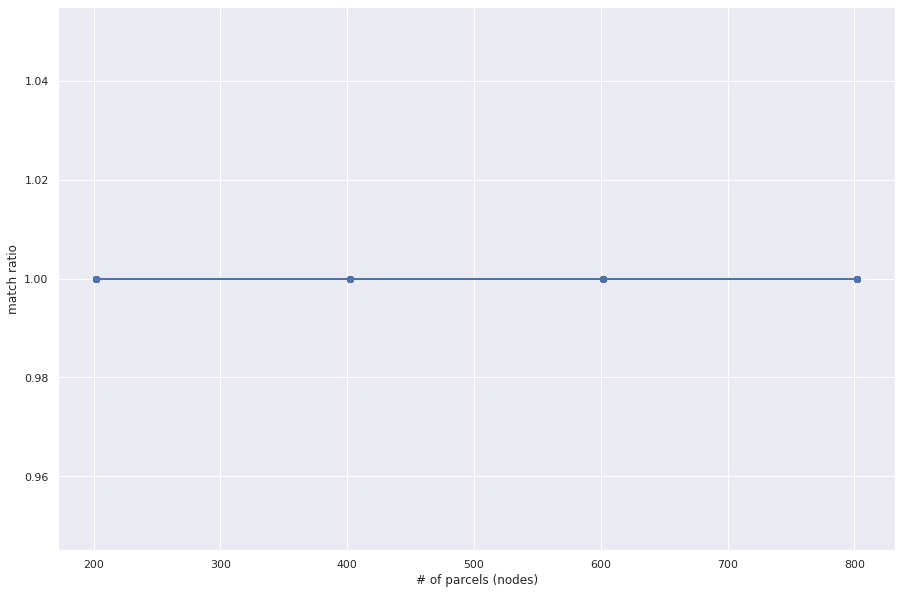

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster')
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(parcels,gm_ratio, marker='o')
plt.xlabel('# of parcels (nodes)')
plt.ylabel('match ratio')



In [11]:
gm_ratio

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [13]:
print(A)

[[0.000e+00 1.370e+03 1.384e+03 ... 8.000e+00 1.200e+01 2.000e+00]
 [2.408e+03 0.000e+00 2.136e+03 ... 0.000e+00 4.900e+01 3.000e+00]
 [9.010e+02 1.261e+03 0.000e+00 ... 0.000e+00 3.000e+00 0.000e+00]
 ...
 [8.700e+01 3.000e+00 1.600e+01 ... 0.000e+00 7.000e+00 5.100e+01]
 [3.200e+01 1.980e+02 1.500e+01 ... 1.500e+01 0.000e+00 1.600e+01]
 [4.000e+00 4.000e+00 1.000e+00 ... 5.000e+01 1.100e+01 0.000e+00]]
